In [146]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report

In [147]:
nba_shots_Chicago_="shot log CHI.csv"

In [148]:
shots = pd.read_csv(nba_shots_Chicago_)
print(shots.shape)
shots = shots[(shots['self previous shot'].notnull()) &
                                (shots['opponent previous shot'].notnull()) & 
                                (shots['location x'].notnull()) & 
                                (shots['location y'].notnull()) & 
                                (shots['quarter'].notnull()) & 
                                (shots['self previous shot'].notnull()) &
                                (shots['opponent previous shot'].notnull()) & 
                                (shots['time'].notnull()) &
                                (shots['time from last shot']) & 
                                (shots['player position'].notnull()) & 
                                (shots['player position'] != 'F') &
                                (shots['player position'] != 'G')]
print(shots.shape)

shots['player_position'] = shots['player position']

(7139, 16)
(6257, 16)


In [149]:
shots.columns.values
# 'location x', 'location y', 'quarter', 'self previous shot', 'opponent previous shot', 'time', 'time from last shot', 'player position', 'home game', 'shot type', 'points', 'time', 'time from last shot', 'quarter', 'current shot outcome'


array(['self previous shot', 'player position', 'home game', 'location x',
       'opponent previous shot', 'home team', 'shot type', 'points',
       'away team', 'location y', 'time', 'date', 'shoot player',
       'time from last shot', 'quarter', 'current shot outcome',
       'player_position'], dtype=object)

In [150]:
# shots.groupby('shoot player')
shots = shots[shots['player_position'] != 'F']

In [151]:
shots['player position'].value_counts()

SG    2298
PF    1433
PG    1164
C     1004
SF     358
Name: player position, dtype: int64

In [152]:
shots[['location x', 'location y', 'quarter', 'player position', 'home game', 'self previous shot', 'shoot player', 'opponent previous shot']]

,location x,location y,quarter,player position,home game,self previous shot,shoot player,opponent previous shot
1,64.0,215.0,1,PF,Yes,SCORED,Taj Gibson,MISSED
2,67.0,259.0,1,PG,Yes,MISSED,Rajon Rondo,MISSED
3,102.0,243.0,1,C,Yes,MISSED,Robin Lopez,MISSED
4,241.0,210.0,1,SG,Yes,MISSED,Dwyane Wade,SCORED
5,239.0,351.0,1,SG,Yes,MISSED,Jimmy Butler,SCORED
...,...,...,...,...,...,...,...,...
7131,769.0,202.0,4,SG,Yes,SCORED,Anthony Morrow,SCORED
7132,833.0,406.0,4,PF,Yes,BLOCKED,Bobby Portis,MISSED
7133,822.0,25.0,4,SG,Yes,MISSED,Anthony Morrow,MISSED
7136,848.0,112.0,4,SG,Yes,MISSED,Anthony Morrow,SCORED


In [153]:
from sklearn import preprocessing


# Model for predicting which position shot the ball:
# explanatory variables
# 'location x', 'location y', 'quarter', 'self previous shot', 'opponent previous shot', 'time', 'time from last shot'
# prediction variables:
# 'player position'


shot_encoder = preprocessing.LabelEncoder()
shot_encoder.fit(shots['self previous shot'].unique().tolist())
print(list(shot_encoder.classes_))
shots['enc_self previous shot'] = shot_encoder.transform(shots['self previous shot'])


opp_shot_encoder = preprocessing.LabelEncoder()
opp_shot_encoder.fit(shots['opponent previous shot'].unique().tolist())
print(list(opp_shot_encoder.classes_))
shots['enc_opponent previous shot'] = opp_shot_encoder.transform(shots['opponent previous shot'])

position_encoder = preprocessing.LabelEncoder()
position_encoder.fit(shots['player position'].unique().tolist())
print(list(position_encoder.classes_))
shots['enc_player position'] = position_encoder.transform(shots['player position'])

home_encoder = preprocessing.LabelEncoder()
home_encoder.fit(shots['home game'].unique().tolist())
print(list(home_encoder.classes_))
shots['enc_home game'] = home_encoder.transform(shots['home game'])

shot_type_encoder = preprocessing.LabelEncoder()
shot_type_encoder.fit(shots['shot type'].unique().tolist())
print(list(shot_type_encoder.classes_))
shots['enc_shot type'] = shot_type_encoder.transform(shots['shot type'])

player_encoder = preprocessing.LabelEncoder()
player_encoder.fit(shots['shoot player'].unique().tolist())
print(list(player_encoder.classes_))
shots['enc_player'] = player_encoder.transform(shots['shoot player'])


current_shot_encoder = preprocessing.LabelEncoder()
current_shot_encoder.fit(shots['current shot outcome'].unique().tolist())
print(list(current_shot_encoder.classes_))
shots['enc_shot outcome'] = current_shot_encoder.transform(shots['current shot outcome'])


shots['enc_time'] = shots['time'].str.replace(':', '.').astype(float)
shots['location x'] = shots['location x'].astype(float)
shots['location y'] = shots['location y'].astype(float)
shots['quarter'] = shots['quarter'].astype(float)
shots['points'] = shots['points'].astype(float)
shots['time from last shot'] = shots['time from last shot'].astype(float)

scaled_model = shots[['location x', 'location y', 'enc_self previous shot', 'enc_opponent previous shot', 'enc_time', 'quarter', 'enc_home game', 'enc_shot type', 'points', 'time from last shot']]

scaler = preprocessing.StandardScaler().fit(scaled_model)
scaled_model = scaler.transform(scaled_model)

target_for_position_model = shots['enc_player position'].values



scaled_shot_model = shots[['location x', 'location y', 'enc_self previous shot', 'enc_opponent previous shot', 'enc_time', 'quarter', 'enc_home game', 'enc_shot type', 'points', 'time from last shot','enc_player','enc_player position']]

scaler = preprocessing.StandardScaler().fit(scaled_model)
scaled_model = scaler.transform(scaled_model)

target_for_shot_model = shots['enc_shot outcome'].values



# things to possibly add later:
# home team, away team.


# [
#        
#        'quarter', 'current shot outcome',
#        'player_position']

['BLOCKED', 'MISSED', 'SCORED']
['BLOCKED', 'MISSED', 'SCORED']
['C', 'PF', 'PG', 'SF', 'SG']
['No', 'Yes']
['Alley Oop Dunk', 'Alley Oop Layup', 'Cutting Dunk Shot', 'Cutting Finger Roll Layup Shot', 'Cutting Layup Shot', 'Driving Bank Hook Shot', 'Driving Bank Shot', 'Driving Dunk', 'Driving Finger Roll Layup', 'Driving Floating Bank Jump Shot', 'Driving Floating Jump Shot', 'Driving Hook Shot', 'Driving Layup', 'Driving Reverse Layup', 'Dunk', 'Fadeaway Bank Shot', 'Fadeaway Jumper', 'Finger Roll Layup', 'Floating Jump Shot', 'Hook Bank Shot', 'Hook Shot', 'Jump Bank Shot', 'Jump Shot', 'Layup', 'Pullup Bank Shot', 'Pullup Jump Shot', 'Putback Dunk', 'Putback Layup', 'Reverse Dunk', 'Reverse Layup', 'Running Alley Oop Dunk Shot', 'Running Dunk', 'Running Finger Roll Layup', 'Running Jump Shot', 'Running Layup', 'Running Pull-Up Jump Shot', 'Running Reverse Layup', 'Step Back Bank Jump Shot', 'Step Back Jump Shot', 'Tip Layup Shot', 'Turnaround Bank Hook Shot', 'Turnaround Bank Shot'

In [154]:
shots[['time from last shot']]

,time from last shot
1,51.0
2,7.0
3,12.0
4,30.0
5,13.0
...,...
7131,28.0
7132,21.0
7133,21.0
7136,26.0


In [155]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(scaled_position_model, target_for_position_model,test_size=0.2,random_state=10)

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = .75
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [157]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
y_pred = gb_clf.predict(X_test)

Learning rate:  0.75
Accuracy score (training): 0.471
Accuracy score (validation): 0.418


In [158]:

target_names = ['C', 'PF', 'PG', 'SF', 'SG']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           C       0.55      0.41      0.47       222
          PF       0.32      0.31      0.31       280
          PG       0.34      0.09      0.14       224
          SF       0.00      0.00      0.00        82
          SG       0.43      0.73      0.54       444

    accuracy                           0.42      1252
   macro avg       0.33      0.31      0.29      1252
weighted avg       0.38      0.42      0.37      1252



In [159]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(scaled_shot_model, target_for_shot_model,test_size=0.2,random_state=10)

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = .75
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [161]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
y_pred = gb_clf.predict(X_test)

Learning rate:  0.75
Accuracy score (training): 0.617
Accuracy score (validation): 0.610


In [176]:

target_names = ['BLOCKED', 'MISSED', 'SCORED']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     BLOCKED       0.20      0.00      0.00       635
      MISSED       0.44      0.59      0.51       553
      SCORED       0.04      0.34      0.08        64

    accuracy                           0.28      1252
   macro avg       0.23      0.31      0.20      1252
weighted avg       0.30      0.28      0.23      1252



In [177]:
print(position_model['player position'].value_counts())

print(position_model['enc_player position'].value_counts())

NameError: name 'position_model' is not defined

In [164]:
shots[shots['player position'] == 'F']['shoot player'].unique()

array([], dtype=object)

In [165]:
newChicagodata1=shots.dropna()
newChicagodata1.isnull().sum()

self previous shot            0
player position               0
home game                     0
location x                    0
opponent previous shot        0
home team                     0
shot type                     0
points                        0
away team                     0
location y                    0
time                          0
date                          0
shoot player                  0
time from last shot           0
quarter                       0
current shot outcome          0
player_position               0
enc_self previous shot        0
enc_opponent previous shot    0
enc_player position           0
enc_home game                 0
enc_shot type                 0
enc_player                    0
enc_shot outcome              0
enc_time                      0
dtype: int64

In [166]:
newChicagodata = newChicagodata1.rename(columns={"player position":"POSITION","location x": "LOC_X", "location y": "LOC_Y", "shoot player":"PLAYER_NAME","current shot outcome":"EVENT_TYPE"})
newChicagodata

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,...,EVENT_TYPE,player_position,enc_self previous shot,enc_opponent previous shot,enc_player position,enc_home game,enc_shot type,enc_player,enc_shot outcome,enc_time
1,SCORED,PF,Yes,64.0,MISSED,CHI,Hook Shot,2.0,BOS,215.0,...,MISSED,PF,2,1,1,1,20,15,1,1.08
2,MISSED,PG,Yes,67.0,MISSED,CHI,Driving Layup,2.0,BOS,259.0,...,MISSED,PG,1,1,2,1,12,13,1,1.15
3,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2.0,BOS,243.0,...,MISSED,C,1,1,0,1,20,14,1,1.27
4,MISSED,SG,Yes,241.0,SCORED,CHI,Jump Shot,2.0,BOS,210.0,...,MISSED,SG,1,2,4,1,22,5,1,1.57
5,MISSED,SG,Yes,239.0,SCORED,CHI,Pullup Jump Shot,2.0,BOS,351.0,...,MISSED,SG,1,2,4,1,25,8,1,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,SCORED,SG,Yes,769.0,SCORED,CHI,Jump Shot,2.0,BRO,202.0,...,BLOCKED,SG,2,2,4,1,22,0,0,8.33
7132,BLOCKED,PF,Yes,833.0,MISSED,CHI,Jump Shot,2.0,BRO,406.0,...,MISSED,PF,0,1,1,1,22,1,1,8.54
7133,MISSED,SG,Yes,822.0,MISSED,CHI,Jump Shot,3.0,BRO,25.0,...,SCORED,SG,1,1,4,1,22,0,2,9.15
7136,MISSED,SG,Yes,848.0,SCORED,CHI,Jump Shot,2.0,BRO,112.0,...,SCORED,SG,1,2,4,1,22,0,2,10.39


In [167]:
newChicagodata['EVENT_TYPE'].unique()

array(['MISSED', 'SCORED', 'BLOCKED'], dtype=object)

In [168]:
print("Total made shots{}".format(newChicagodata[newChicagodata['EVENT_TYPE'] == 'SCORED'].shape))
print("Total missed shots{}".format(newChicagodata[newChicagodata['EVENT_TYPE'] == 'MISSED'].shape))

Total made shots(2815, 25)
Total missed shots(3087, 25)


In [169]:
newChicagodata['shot type'].unique()

array(['Hook Shot', 'Driving Layup', 'Jump Shot', 'Pullup Jump Shot',
       'Driving Bank Shot', 'Tip Layup Shot', 'Cutting Dunk Shot',
       'Turnaround Hook Shot', 'Driving Reverse Layup', 'Reverse Dunk',
       'Turnaround Jump Shot', 'Alley Oop Dunk',
       'Driving Floating Jump Shot', 'Layup', 'Putback Layup',
       'Alley Oop Layup', 'Reverse Layup', 'Step Back Jump Shot',
       'Running Layup', 'Turnaround Fadeaway Shot', 'Floating Jump Shot',
       'Driving Finger Roll Layup', 'Dunk', 'Fadeaway Jumper',
       'Turnaround Fadeaway', 'Running Jump Shot', 'Cutting Layup Shot',
       'Turnaround Fadeaway Bank Jump Shot', 'Finger Roll Layup',
       'Jump Bank Shot', 'Putback Dunk', 'Driving Hook Shot',
       'Driving Dunk', 'Running Finger Roll Layup', 'Running Dunk',
       'Driving Floating Bank Jump Shot', 'Fadeaway Bank Shot',
       'Running Pull-Up Jump Shot', 'Turnaround Bank Shot',
       'Running Alley Oop Dunk Shot', 'Driving Bank Hook Shot',
       'Turnaround 

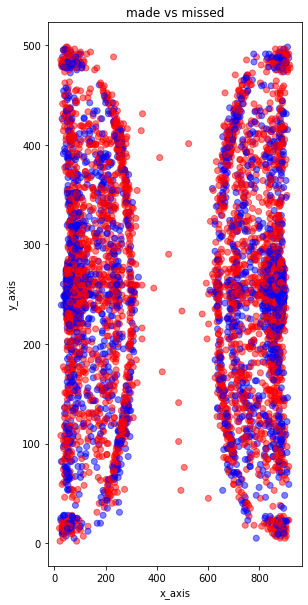

In [170]:
#visulization of what the current data looks like for shits and 
plt.figure(figsize=(10,10))

colors = np.where(newChicagodata['EVENT_TYPE']=='SCORED',"blue","red");
colors.shape
plt.subplot(121)
plt.title('made vs missed')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.scatter(newChicagodata.LOC_X,newChicagodata.LOC_Y,color=colors,alpha=0.5)

In [171]:
shots_taken_groups = newChicagodata.groupby('shot type')
for column, frame in shots_taken_groups:
    print('Column: {0}, Frame: {1}'.format(column, len(frame)))

Column: Alley Oop Dunk, Frame: 36
Column: Alley Oop Layup, Frame: 33
Column: Cutting Dunk Shot, Frame: 44
Column: Cutting Finger Roll Layup Shot, Frame: 8
Column: Cutting Layup Shot, Frame: 93
Column: Driving Bank Hook Shot, Frame: 3
Column: Driving Bank Shot, Frame: 27
Column: Driving Dunk, Frame: 34
Column: Driving Finger Roll Layup, Frame: 51
Column: Driving Floating Bank Jump Shot, Frame: 27
Column: Driving Floating Jump Shot, Frame: 118
Column: Driving Hook Shot, Frame: 48
Column: Driving Layup, Frame: 449
Column: Driving Reverse Layup, Frame: 85
Column: Dunk, Frame: 83
Column: Fadeaway Bank Shot, Frame: 8
Column: Fadeaway Jumper, Frame: 155
Column: Finger Roll Layup, Frame: 14
Column: Floating Jump Shot, Frame: 147
Column: Hook Bank Shot, Frame: 5
Column: Hook Shot, Frame: 187
Column: Jump Bank Shot, Frame: 41
Column: Jump Shot, Frame: 2804
Column: Layup, Frame: 480
Column: Pullup Bank Shot, Frame: 12
Column: Pullup Jump Shot, Frame: 312
Column: Putback Dunk, Frame: 17
Column: Pu

In [172]:
changedmissed = newChicagodata.replace(to_replace = "MISSED", value = "0")
changedmissed

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,...,EVENT_TYPE,player_position,enc_self previous shot,enc_opponent previous shot,enc_player position,enc_home game,enc_shot type,enc_player,enc_shot outcome,enc_time
1,SCORED,PF,Yes,64.0,0,CHI,Hook Shot,2.0,BOS,215.0,...,0,PF,2,1,1,1,20,15,1,1.08
2,0,PG,Yes,67.0,0,CHI,Driving Layup,2.0,BOS,259.0,...,0,PG,1,1,2,1,12,13,1,1.15
3,0,C,Yes,102.0,0,CHI,Hook Shot,2.0,BOS,243.0,...,0,C,1,1,0,1,20,14,1,1.27
4,0,SG,Yes,241.0,SCORED,CHI,Jump Shot,2.0,BOS,210.0,...,0,SG,1,2,4,1,22,5,1,1.57
5,0,SG,Yes,239.0,SCORED,CHI,Pullup Jump Shot,2.0,BOS,351.0,...,0,SG,1,2,4,1,25,8,1,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,SCORED,SG,Yes,769.0,SCORED,CHI,Jump Shot,2.0,BRO,202.0,...,BLOCKED,SG,2,2,4,1,22,0,0,8.33
7132,BLOCKED,PF,Yes,833.0,0,CHI,Jump Shot,2.0,BRO,406.0,...,0,PF,0,1,1,1,22,1,1,8.54
7133,0,SG,Yes,822.0,0,CHI,Jump Shot,3.0,BRO,25.0,...,SCORED,SG,1,1,4,1,22,0,2,9.15
7136,0,SG,Yes,848.0,SCORED,CHI,Jump Shot,2.0,BRO,112.0,...,SCORED,SG,1,2,4,1,22,0,2,10.39


In [173]:
changedscored = changedmissed.replace(to_replace = "SCORED", value = "1")
changedblocked = changedscored.replace(to_replace = "BLOCKED",value = "2")
formattedChicago = changedblocked
formattedChicago

,self previous shot,POSITION,home game,LOC_X,opponent previous shot,home team,shot type,points,away team,LOC_Y,...,EVENT_TYPE,player_position,enc_self previous shot,enc_opponent previous shot,enc_player position,enc_home game,enc_shot type,enc_player,enc_shot outcome,enc_time
1,1,PF,Yes,64.0,0,CHI,Hook Shot,2.0,BOS,215.0,...,0,PF,2,1,1,1,20,15,1,1.08
2,0,PG,Yes,67.0,0,CHI,Driving Layup,2.0,BOS,259.0,...,0,PG,1,1,2,1,12,13,1,1.15
3,0,C,Yes,102.0,0,CHI,Hook Shot,2.0,BOS,243.0,...,0,C,1,1,0,1,20,14,1,1.27
4,0,SG,Yes,241.0,1,CHI,Jump Shot,2.0,BOS,210.0,...,0,SG,1,2,4,1,22,5,1,1.57
5,0,SG,Yes,239.0,1,CHI,Pullup Jump Shot,2.0,BOS,351.0,...,0,SG,1,2,4,1,25,8,1,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,1,SG,Yes,769.0,1,CHI,Jump Shot,2.0,BRO,202.0,...,2,SG,2,2,4,1,22,0,0,8.33
7132,2,PF,Yes,833.0,0,CHI,Jump Shot,2.0,BRO,406.0,...,0,PF,0,1,1,1,22,1,1,8.54
7133,0,SG,Yes,822.0,0,CHI,Jump Shot,3.0,BRO,25.0,...,1,SG,1,1,4,1,22,0,2,9.15
7136,0,SG,Yes,848.0,1,CHI,Jump Shot,2.0,BRO,112.0,...,1,SG,1,2,4,1,22,0,2,10.39


In [174]:
from sklearn.model_selection import train_test_split

y = np.array(formattedChicago['EVENT_TYPE']).astype(int)
X = formattedChicago.drop('EVENT_TYPE',1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [175]:
from sklearn import preprocessing 
locationoncourt = X_train[['LOC_X','LOC_Y']]

scaler = preprocessing.StandardScaler().fit(locationoncourt)
locationoncourt_scaled = scaler.transform(locationoncourt)

print(locationoncourt_scaled.mean(axis=0), locationoncourt_scaled.std(axis=0))
X_train.loc[:,0] = (locationoncourt_scaled[:,0]/locationoncourt_scaled[:,1])

[ 1.41966581e-17 -5.78513816e-17] [1. 1.]


/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nicholasbergeland/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
